In [190]:
import pandas as pd
from datetime import datetime
import numpy
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from collections import Counter

In [191]:
def make_a_panda():
    #################### Path Locations of all CSV files #####################
    csvForbes = 'C:\\Users\\simskel\\Desktop\\Springboard-Data-Science-Immersive\\Capstone 1 Project\\Data\\Ripple_Forbes.csv'
    csvCNBC = 'C:\\Users\\simskel\\Desktop\\Springboard-Data-Science-Immersive\\Capstone 1 Project\\Data\\Ripple_CNBC.csv'
    csvCointelegraph = 'C:\\Users\\simskel\\Desktop\\Springboard-Data-Science-Immersive\\Capstone 1 Project\\Data\\Ripple_Cointelegraph.csv'
    csvCoindesk = 'C:\\Users\\simskel\\Desktop\\Springboard-Data-Science-Immersive\\Capstone 1 Project\\Data\\Ripple_Coindesk.csv'
    csvBitcoin = 'C:\\Users\\simskel\\Desktop\\Springboard-Data-Science-Immersive\\Capstone 1 Project\\Data\\Ripple_Bitcoin.csv'
    
    #################### Make Pandas DataFrames ##########################
    dfForbes = pd.read_csv(csv, encoding = 'utf-8', parse_dates = True)
    dfCNBC = pd.read_csv(csvCNBC, encoding = 'utf-8', parse_dates = True)
    dfCointelegraph = pd.read_csv(csvCointelegraph, encoding = 'utf-8', parse_dates = True)
    dfCoindesk = pd.read_csv(csvCoindesk, encoding = 'utf-8', parse_dates = True)
    dfBitcoin = pd.read_csv(csvBitcoin, encoding = 'utf-8', parse_dates = True)
    
    #Make a list of the DataFrames
    site = [dfForbes, dfCNBC, dfCointelegraph,dfCoindesk,dfBitcoin]
    
    #Concat the DataFrames into one
    df = pd.concat(site).reset_index()
    df.Date = pd.to_datetime(df.Date)
    df.set_index('Date', inplace = True)
    
    # Replace \xa0 non-breaking space in Latin1 (ISO 8859-1) with unicode space u' ' in the Text column
    df.Text = df.Text.apply(lambda x: x.replace(u'\xa0', u' '))
    
    
    #DataFrame of Ripple Pricing Data
    df2 = pd.read_csv('C:\\Users\\simskel\\Desktop\\Springboard-Data-Science-Immersive\\Capstone 1 Project\\Data\\XRP USD Poloniex Historical Data.csv', parse_dates = True)
    #Convert string dates to datetime dates
    df2.Date = pd.to_datetime(df2.Date)
    #remove the last 2 rows of the dataframe - Junk data
    df2 = df2.iloc[:-2]
    #Set Date column as Index
    df2.set_index('Date', inplace = True)
    #Sort the index
    df2 = df2.sort_index(ascending = True)
    #convert columns from string to type Float
    df2[['Price','High','Low','Change %']] = df2[['Price','High','Low','Change %']].applymap(lambda x: float(x))
    
    return df, df2

In [192]:
df, df2 = make_a_panda()

In [193]:
df.Text[0]

'GERMANY, BONN - JANUARY 31: Symbol photo on the topics crypto currency, digital currency, currency speculation, course gains, course losses, money laundering, crime. etc. The picture shows Ripple coins and a Bitcoin (physical). (Photo by Ulrich Baumgarten via Getty Images) Ripple solidifies #3 cryptocurrency spot with a $35.7B market cap. [Ed note: Investing in cryptocoins or tokens is highly speculative and the market is largely unregulated. Anyone considering it should be prepared to lose their entire investment.] After a general trend of consolidation in the worldwide cryptocurrency market—following drops in the Dow Jones industrial average, Facebook banning cryptocurrency advertising, news of Chinese and South Korean regulation, India pushing toward a crackdown and news of Tether and Bitfinex subpoenas—the market cap is beginning to inch back up after January\'s lows. One coin in particular made big leaps overnight (PST): Ripple (XRP). Disclosure: I own some Ripple.  According to 

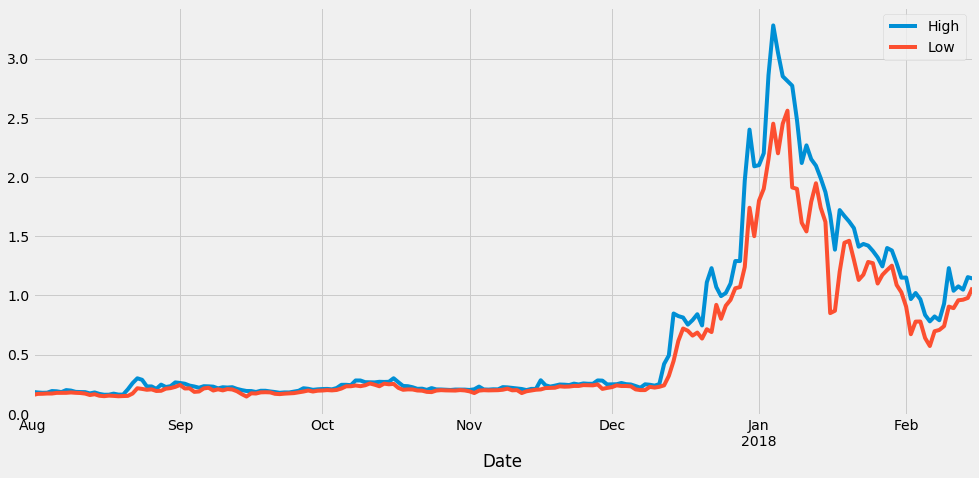

In [194]:
df2[['High','Low']].plot(figsize = (15,7))
plt.show()